# Machine Learning Algorithm Tutorial
## Algorithms to be Covered
### Linear Regression (Supervised)
### K-Nearest Neighbours (Supervised Lazy Learning)
### Principle Component Analysis (PCA) (Unsupervised) 
### Decision Tree for Regression (Supervised)

These algorithms will be rated in several areas in the conclusion.
<br>Difficulty out of 5
<br>Real world application out of 5
<br>Processing Power out of 5


# Linear Regression
## Learning Resources

[Data Processing](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d)<br>
[Linear Regression](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)<br>
[Alt Tutorial](https://pub.towardsai.net/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660)<br>
[Dataset](https://www.kaggle.com/ashydv/advertising-dataset)
<br> [Useful Video](https://www.youtube.com/watch?v=zPG4NjIkCjc)
## Introduction
### What is Linear Regression?
Linear Regression is a supervised algorithm where the predicted output has a constant slope and is relatively continuous. It is used to predict values within a continuous range. Linear regression can be used to predict sales in a company or hosuing cost based on the size of the house. It has many applications. There are two types of Linear Regression.
### Simple Regression
Simple regression implements the traditional slope formula;
#### **y = mx + b**<br>
m represents the slope value, b represents the y intercept, x represents the input value and y represents the prediction.
### Multivariable Regression
A more complex implementation might look like this depending on the amount of variables. This example may have one prediction with three variables.
#### **f(x,y,z) = w1x + w2y + w3z**<br>
f represents the prediction value and x, y and z represent the variables.
<br><br>


## For this example
 ### we will use the Ordinary Least Squares method. Without using machine learning in order to understand the process better.
#### Yₑ = α + β X

# Linear Regression Manual Implementation

## Import libraries

In [230]:
## for data
import pandas as pd 
import numpy as np 
## for plotting
from matplotlib import pyplot as plt


## Generate Data

In [231]:
# Generate data
np.random.seed(0) 
x = 2.5 * np.random.randn(100) + 1.5 # array of 100 values, mean = 1.5 , stddev = 2.5
res = 0.5 * np.random.randn(100) # gnerate 100 terms
y = 2 + 0.3 * x + res # actual values of Y

## Insert generated data into pandas dataframe

In [232]:
# create pandas dataframe and insert new gnerated data
df = pd.DataFrame(
    {'X': x, 
    'Y':y}
)
# Show first 5 rows of dataframe
df.head()

,X,Y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [233]:
# Calculate mean values
xmean = np.mean(x)
ymean = np.mean(y)

# calculate numerator and denominator
df['xycov'] = (df['X'] - xmean) * (df['Y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Caclulate alpha and beta values
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


Now we have our alpha and beta values. The formula for the predicted line can be written as;
#### **Y = 2.003 + 0.323X**

## Populate Graph

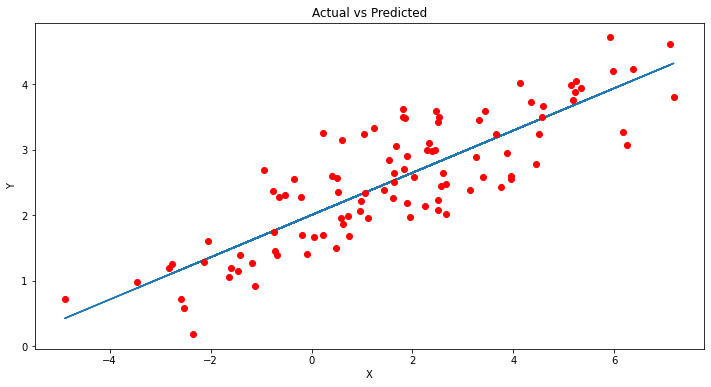

In [234]:
ypred = alpha + beta * x
# compare regression data to actual data
# create scatter plot and regression line
plt.figure(figsize=(12,6))
plt.plot(x, ypred) # regression line
plt.plot(x, y, 'ro') # scatter plot
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

The blue line represents our predicted Y values. The red circles are the actual values of Y. This blue line is a best fit line, continuous with a constant slope.

# Regression with Machine Learning
## Import Libraries

In [235]:
## for data
import pandas as pd 
import numpy as np 
## for plotting
from matplotlib import pyplot as plt 
## for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Import data from csv file

In [236]:
advert = pd.read_csv('data/advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Pre-Processing
When pre processing data, the goal is to remove / replace unwanted data. In this example our dataset is large enough that we don't need to replace data. We will discuss Standarisation and Handling Categorical Variables in other examples.

In [237]:
# Drop unwanted collums
#advertProcessed = advert.drop(['Radio'], axis=1)
#advertProcessed = advertProcessed.drop(['Newspaper'], axis=1)
# Check for null values
advert.isnull().sum()
# Drop null values (Our dataset is large enough that we will not miss null values)
advert.dropna()
advert.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [238]:
# split data into x and y.
predictors = ['TV']
Xtv = advert[predictors]
Y = advert['Sales']
# set and fit models
lmtv = LinearRegression()
modeltv = lmtv.fit(Xtv, Y)

In [239]:
predictors = ['Radio']
Xrad = advert[predictors]
Y = advert['Sales']
lmrad = LinearRegression()
modelrad = lmrad.fit(Xrad, Y)

In [240]:
predictors = ['Newspaper']
Xnews = advert[predictors]
Y = advert['Sales']
lmnews = LinearRegression()
modelnews = lmnews.fit(Xnews, Y)

In [241]:
predictors = ['TV', 'Radio', 'Newspaper']
X = advert[predictors]
Y = advert['Sales']
lm = LinearRegression()
model = lm.fit(X, Y)

In [242]:
print(f'aplha = {model.intercept_}')
print(f'beta = {model.coef_}')

aplha = 4.625124078808652
beta = [0.05444578 0.10700123 0.00033566]


The formula for our line can now be written as;
#### Sales = 6.974821 + 0.05546477TV

## Test our model for comparison later with the Decision Tree Regression

## Divide datset into train / test + Make Prediction

In [243]:
X_train, X_test, y_train, y_test = train_test_split(Xtv, Y, test_size=0.2, random_state=0)
test = modeltv.fit(X_train, y_train)
tv_pred = test.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(Xrad, Y, test_size=0.2, random_state=0)
test = modelrad.fit(X_train, y_train)
rad_pred = test.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(Xnews, Y, test_size=0.2, random_state=0)
test = modelnews.fit(X_train, y_train)
news_pred = test.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
test = model.fit(X_train, y_train)
y_pred = test.predict(X_test)


In [244]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
18,11.3,10.709889
170,8.4,8.686298
107,12.0,9.577870
98,25.4,24.862080
177,16.7,14.655845
182,8.7,8.321427
5,7.2,10.430480
146,18.2,18.445376
12,9.2,9.733943
152,16.6,17.929080


## Calculate metrics for comparison later

In [245]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4170313030600667
Mean Squared Error: 4.522552562041292
Root Mean Squared Error: 2.126629389912895


## Populate Graph

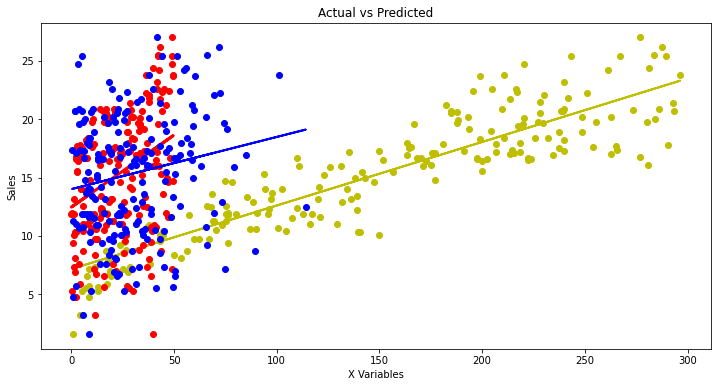

In [246]:
tvsales_pred = modeltv.predict(Xtv)
radsales_pred = modelrad.predict(Xrad)
newssales_pred = modelnews.predict(Xnews)
# compare regression data to actual data
# create scatter plot and regression line
plt.figure(figsize=(12,6))

plt.plot(Xtv, tvsales_pred, 'y',linewidth=2) # regression line
plt.plot(Xtv, Y, 'yo') # scatter plot

plt.plot(Xrad, radsales_pred, 'r', linewidth=3)
plt.plot(Xrad, Y, 'ro')

plt.plot(Xnews, newssales_pred, 'b', linewidth=2)
plt.plot(Xnews, Y, 'bo')

plt.title('Actual vs Predicted')
plt.xlabel('X Variables')
plt.ylabel('Sales')

plt.show()

It is difficult to produce a graph with all the X variables but we can try anyway, in this graph here. We set the 3 different variables to different colors, all with their own models. Tv sales prediction can be seen in Yellow. Radio Sales prediction can be seen in Blue and News Sales prediction can be seen in Red. From our graph here, TV and Radio seem to be the most effective avertising techniques.

# Conclusion
Linear regression is straightforward and easy to implement, because of this it is a very popular algorithm with a 67% usage in Industry. It is easy and efficient to train a Linear regression algorithm with relatively low requirements for processing power. This produces a much lower time complexity when compared to other algorithms. The inner workings of linear regression are easy to understand and can be demonstrated in a manual format.
<br><br>Outliers can be a big problem for linear regression and may skew the best fit line. Linear regression also assumes that there is a straight line relationship between data points. This may be a problem if you do not know what datapoints are dependant and independant. This may also skew results. Linear regression may fall victim to overfitting but there are techniques you can employ to avoid this.
<br> Overall I like linear regression as it performs its task well and is very useful in many applications.
### Diffculty 1/5
### Real World Application 5/5
### Processing Power 1/5
If you want to learn more, or alternate solutions, please refer to the 'Learning Resources' section at the beginning of this example.

# K-Nearest Neighbour
## Learning Resources
[KNN](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)
<br>[Alt Tutorial](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
<br>[Dataset](https://archive.ics.uci.edu/ml/datasets/Iris)
<br>[Useful Video](https://www.youtube.com/watch?v=HVXime0nQeI)
## Introduction
### What is K-Nearest Neighbour?
KNN is a supervised machine learning algorithm that can be used to solved classfication and regression problems. It does this by classifying datapoints based on the points that are most similar to it. It uses this data to make a guess with unclassified data. This is considered lazy learning as there is no training data. All of the data may be considered training data.<br>
KNN relies heavily on the data given to it as it does not make any assumptions. It uses the structure of the supplied data. Because of this, the accuracy of your model depends on the quality of the data.
### Where is KNN used
KNN  has many applications in industry. It is used for simple recommendation systems for services like Youtube and Netflix, this is useful for recommending items that have a similar classification i.e. Genre of a movie or tv show. KNN can also be used in file systems for searching for similar documents etc. KNN is most effective with low dimensional data. 
### How does it work?
KNN works by classifying unclassified data, it does this by simply calculating the distance of a data point to all other datapoints. It then selects the nearest datapoints , then it assigns this datapoint the classfication of the majority of the nearest datapoints. <br><br>
<img src="Images/k-nearest-neighbors-algorithm-python-scikit-learn-2.png">
<br><br>If a new datapoint was placed at 'x' the algorithm would determine its classification to be red. This example is ideal as there are only 2 dimensions.

## Import Libraries


In [247]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Import Dataset

In [248]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Create Dataframe
dataset = pd.read_csv(url, names=names)

In [249]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pre-Processing
First we need to process the data to ensure it can be used, as we mentioned before, KNN relies heavily on the quality of the data provided.

In [250]:
# Attributes
x = dataset.iloc[:, :-1].values
# labels
y = dataset.iloc[:, 4].values

## Train test split
We set the test size to 20% of 150 which is 30. This will allow us to understand how the alogrithm performs with un-seen data. This also helps to avoid over-fitting.

In [251]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Normalisation
If we do not normalise the data, we may experience diffculties when classifying data. If one feature in the data as a broad range of values, this was negatively impact the result giving false classifications. Therefore the data needs to be normalised.<br>
This is also known as feature scaling.

In [252]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training Predictions
Training for the KNN algorithm is simple and does not require much processing power. We initalise the class our K value, denoted below as n_neighbours. You may initalise this value to any number you want, although it is typically set as 5.

In [253]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Now make predictions on the test data

In [254]:
y_pred = classifier.predict(X_test)

## Evaluation of the Algoirthm
Evaluation of the algorithm will be done by measuring; Confusion Matrix, Precision, Recall and F1 score. We will use the confusion_matrix and classification_report methods of sklearn.metrics.

In [255]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 14  1]
 [ 0  2  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.91      0.89      0.90        30
   weighted avg       0.90      0.90      0.90        30



These results demonstrate that in our test data of 30 records, we were able to classify the records with a 91% + accuracy.

## Determining the best initialization of the K value
Earlier we chose 5 to initliase the K value, however this way not be the best value. We happened to acheive a 90% + accuracy with 5, so it was a good guess.
<br> To determine the best value of K we will produce a graph with many potential values we could initliase with and compare them to their error rates.
<br><br>
We will use a broad range (1-60) so we can say without a doubt what the best inialisation would be. We need to calculate the mean error %. We will do this by summing up the error values and plotting on a graph.

In [256]:
error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

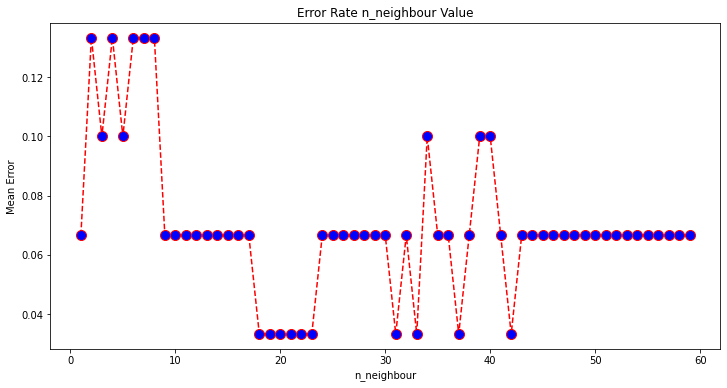

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate n_neighbour Value')
plt.xlabel('n_neighbour')
plt.ylabel('Mean Error')

We can observe that the best values for K lay between 1-16 with 2 exceptions at 2 and 4.
<br><br>
It would be ideal to plot the results of this algorithm on a graph but there is no easy way to plot 4 dimensions. So we settle for execution results such as accuracy.

# Conclusion
KNN is simple and straightforward to implement. It doesn't require any training to produce accurate results. It is a very versatile algorithm and can be applied to several areas, classifcation, regression and search. Because of this, it is a popular algorithm in the industry with a 46% usagae accross every field. It is a powerful tool for classifcation and produces a low time complexity when compared to other algorithms it is comparable to linear regression. It is valuable in the entertainment industry as a simple recommendation system and is also applicable in image processing. KNN is easy to understand but, it requires slightly more work than Linear Regression.
<br><br>
Although KNN is quick with lower amounts of data it drastically gets slower as the volume of data increases, this wouldn't be ideal if predictions needed to be made quickly. However, with sufficient hardware this may not be a problem. A problem that may arise, how many neighbours should be evaluated when classifying items? How far should you search? KNN depends on high quality, highly processed data. 

### Diffculty 2/5
### Real World Applications 4/5
### Processing Power 4/5 (Slow)
If you want to learn more, or alternate solutions, please refer to the 'Learning Resources' section at the beginning of this example.

# Principle Component Analysis for Data Visualization

# Learning Resources
[PCA](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb)<br>
[Alt Tutorial](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)<br>
[Dataset](https://archive.ics.uci.edu/ml/datasets/Iris)<br>
[Useful Video](https://www.youtube.com/watch?v=HMOI_lkzW08)<br>
[PCA Analysis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)


# Introduction
## What is PCA?
PCA's purpose serves to reduce dimensions of large datasets so you can visualise that data in a 2D format. It does this by transforming the large set into a smaller one with most of the information preserved.<br>
This process comes at the expense of sacrificing accuracy but this tradeoff is a small amount of accuracy for simplicity. This is a powerful tool for teaching. The PCA process helps you understand the data you are working with better. Humans are visual creatures and this is crucial. The idea is to reduce dimensions while preserving most of the information.
## Where is PCA used?
PCA has many uses and real world applications. Such as; data compression, image processing, data visualization, exploratry data anaylsis and pattern recognition.
Pattern recognition is a hot topic these days with applications in fields such as data mining, finance (fraud detection) psychology and much more.
## How does it work?
In simple terms, we will be reducing the dimensions in a datasat to a more appropiate format that is easier to visualise. I.e. 8 dimensions to 2 dimensions.

## Import Libraries

In [258]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load dataset
We will use the dataset from the previous example as we had trouble visualising the 4 Dimensions of the dataset.

In [259]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names
names = ['sepal length','sepal width','petal length','petal width','target']

# Create Dataframe
dataset = pd.read_csv(url, names=names)

In [260]:
dataset.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-Processing
### Standarization
Convert the data to a common format, the data may already be in a common format but this is an important step in case it is not. This will ensure an accurate result.<br><br>
It is also important to standarize the data as we are reducing the size of the dataset so some information will be lost. If there are large differences between the ranges of the intial variables, the larger ranges will dominate while the smaller ranges become obscure. This will produce a skewed result.

In [261]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = dataset.loc[:, features].values

In [262]:
y = dataset.loc[:,['target']].values

In [263]:
x = StandardScaler().fit_transform(x)

In [264]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D

In [265]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [266]:
dataset[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [267]:
finalDf = pd.concat([principalDf, dataset[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualise the 2D Projection
The PCA projection can be used to 2D visualise the dataset. Here we will use different colors to identift the different groups within the dataset.

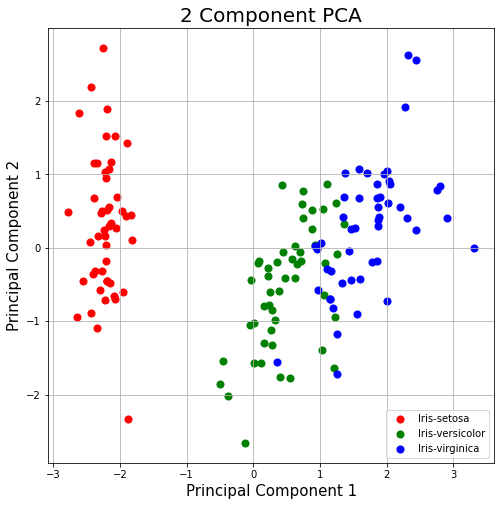

In [268]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

This data has been visualised well, there can be 3 distinct groups seen within the graph. We have succesffuly reduced 4 dimensions to 2 dimensions.

## Explained Variance
The explained varaince tells us the proportion to which the model accounts for dispersion of datapoints in the dataset. 

In [269]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

# Conclusion
PCA is a very popular algorithm with a 43% usage across industries.
It is very useful and applicable in a wide range of applications. PCA will allow you to run your algorithm on a 'summarised' dataset instead of a dataset that has hundreds or thousands of collums. Often in the real world this is the case, so it is valuable to perform PCA on your dataset before running your algorithm. This greatly improves your algorithm's performance. You may pick and choose which collums to get rid of that will have no impact on your final result. PCA is effective at reducing overfitting.<br>
The main positive effect which we observed in this tutorial was the improvement of visualization. In the previous example we could not visualise the dataset as it had too many dimensions. As we have evolved to understand 3D and 2D , 4D is a mind boggler. We effectively reduced this to 2D. <br><br>

Some negatives to PCA are, data must be standarized before performing PCA. If standarization is not done, you will not be able to find the optimal principle components. This will produce a bias in your data post PCA.<br>
By nature of PCA, information is lost, which is bad but it is a neccessary trade.
<br>
Independant variables may become less interpretable.
### Diffculty 3/5
### Real World Application 5/5
### Processing Power 3/5
Processing power depends on the size of your dataset and is often, in a real world setting, a massive job.
If you want to learn more, or alternate solutions, please refer to the 'Learning Resources' section at the beginning of this example.

# Decision Trees for Regression
## Learning Resources
[Decision Trees for Regression](https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)<br>
[Another TUT](https://www.w3schools.com/python/python_ml_decision_tree.asp)<br>
[Dataset](https://drive.google.com/file/d/1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_/view)<br>
[Useful Video](https://www.youtube.com/watch?v=DCZ3tsQIoGU)<br>
[Interesting Article](https://www.statology.org/linear-regression-real-life-examples/)
## Introduction
## What is Decision Tree Regression?
Decision tree regression models are in the form of a tree structure. It breaks down the dataset into smaller, more managable datasets. As the tree gets more and more developed, smaller subsets of the dataset are created. <br>
Decision trees are simple yet powerful however. 
## Where is it used?
It can be used in many applications, like understanding the relationship between sales and advertising spending. It can also be used in the mdeical field by understanding the relationship between drug dosage and blood pressure of patients. It can be used in the farming industry by measuring the effect of fertilizer and water on crop yields.
## How does it work?
<img src="Images/decision.png">

## Import Libaraies

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

## Import Dataset
We will use the same dataset, from the first example so we can examine the difference in accuracy between the two forms of regression.

In [271]:
dataset = pd.read_csv('data/advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [272]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Pre-processing

In [273]:
x = dataset.drop('Sales', axis=1)
y = dataset['Sales']

## Divide datset into train / test

In [274]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [275]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [276]:
y_pred = regressor.predict(X_test)

In [277]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
18,11.3,9.7
170,8.4,9.7
107,12.0,13.2
98,25.4,25.5
177,16.7,16.7
182,8.7,12.6
5,7.2,12.0
146,18.2,18.4
12,9.2,8.8
152,16.6,17.4


## Evaluation

In [278]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3625
Mean Squared Error: 4.410749999999999
Root Mean Squared Error: 2.100178563836894


## Now lets compare these results to the results we achieved earlier with Linear Regression

## From Decision Trees we achieved the result of

Mean Absolute Error: 1.3625<br>
Mean Squared Error: 4.410749999999999<br>
Root Mean Squared Error: 2.100178563836894<br>

## From Linear Regression we achieved the results of

Mean Absolute Error: 1.4170313030600667<br>
Mean Squared Error: 4.522552562041292<br>
Root Mean Squared Error: 2.126629389912895<br>


# Conclusion
From our comparison of Linear Regression and Decision Tree Regression. We found that the Decision Trees produced a more accurate result. In terms of utilising the two types of regression, linear was very easy to understand, straightforward to implement and demonstratable in a manual format. The Decision trees were just as easy to implement and overall offered a very similar experience and similarly accurate result.


Decision trees are a very popular aglorithm with 55% usage across industries. Similar to linear regression, this offers similar time complexity to linear regression but a bit slower, also with relatively low processing power required. Decision trees require less pre-processing, no normalization, no scaling, missing values do not affect the end result.<br><br>

Small changes in the data may create large differences in the decision tree, sometimes a decision tree may be a overly complex solution for the problem. Decision trees may take a longer time to train the model when compared to similar solutions. The decision tree may not be a good solution when predicting continuous values.

### Diffculty 1/5
### Real World Application 4/5
### Processing Power 3/5
If you want to learn more, or alternate solutions, please refer to the 'Learning Resources' section at the beginning of this example.

# My Favourite Algorithm
Principle Component Analysis for Data Visualization was the algorithm I enjoyed implementing the most, it has great real world applications. It is very useful and interesting in terms of Data Science. It could be considered a supplimentary technique that can be used in preparation / pre-processing. I think the concept of compressing many dimensions down to something visually understanable is very powerful and unique. 